# **Walmart 쇼핑몰 데이터 분석**

https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset

- Customer Purchase Patterns and Demographics
- [Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset)  walmart.csv
- 데이터 전처리, 탐색적 데이터 분석(EDA)을 통한 데이터의 분포 확인
- VIP 고객 도출 및 지역별 구매 고객 특징을 파악하여 마케팅 전략을 도출
- 데이터 상세: 약 55만개의 사용자 거래 내역과 10개의 특징(550068, 10)

# 1. 프로젝트 개요

프로젝트는 Kaggle의 E-Commerce (Walmart) Sales Dataset의 고객 구매 데이터를 활용하여 데이터 전처리와 탐색적 데이터 분석을 수행하였습니다. 이를 통해 데이터의 전반적인 분포와 주요 특징을 파악하고, VIP 고객을 식별하며, 지역별과 인구통계학적 구매 고객의 특징을 파악하고 구매 패턴 분석을 하여 효과적인 맞춤형 마케팅 전략을 도출하는 것을 목표로 하였습니다.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# 2. 데이터 구조 파악

## 2.1 탐색적 데이터 분석

In [38]:
df.shape

(550068, 10)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [40]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [41]:
df.value_counts()

User_ID  Product_ID  Gender  Age    Occupation  City_Category  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase
1000001  P00000142   F       0-17   10          A              2                           0               3                 13650       1
1004007  P00105342   M       36-45  12          A              1                           1               1                 11668       1
         P00115942   M       36-45  12          A              1                           1               8                 9800        1
         P00115142   M       36-45  12          A              1                           1               1                 11633       1
         P00114942   M       36-45  12          A              1                           1               1                 19148       1
                                                                                                                                        ..
1001973  P00265242   M       26-

In [42]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

## 2.2 결측치 제거

In [43]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [44]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [60]:
# Product_Category를 중점으로 보고 각 고유의 product_ID 는 제거 해도 되지 않을까..?? 
product_ID_category = df[['Product_ID', 'Product_Category']].drop_duplicates()
product_ID_category

,Product_ID,Product_Category
0,P00069042,3
1,P00248942,1
2,P00087842,12
3,P00085442,12
4,P00285442,8
...,...,...
545915,P00375436,20
545916,P00372445,20
545920,P00370293,19
545923,P00371644,20


## 2.3 데이터 설명

550068 rows 와 10 columns로 구성된 결측치가 없는 데이터

- User_ID: 각 고객의 고유 번호
- Product_ID: 각 제품의 고유 번호
- Gender: 고객의 성별: (F: 여성, M: 남성)
- Age: 고객의 연령대 그룹 
('0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25')
- Occupation: 고객의 직업 그룹
- City_Category: 고객이 거주하는 도시 유형
- Stay_In_Current_City_Years: 현재 도시 거주 기간
- Marital_Status: 결혼 여부 (0: No-married, 1:Married)
- Product_Category: 구매한 제품의 카테고리
- Purchase: 고객의 구매 금액

특이점:
- User_ID 가 5891명의 고유한 고객 ID 존재
- Product_ID 는 3631개의 고유한 제품이 존재하는데 Product_Category 에 각 고유의 제품 ID 가 포함되어 있으니 분석시 크게 영향일 미치지 않다는 추론으로 Product_Category 위주로 분석


# 3. 시각화

## 3-1. 각 변수의 분포 시각화

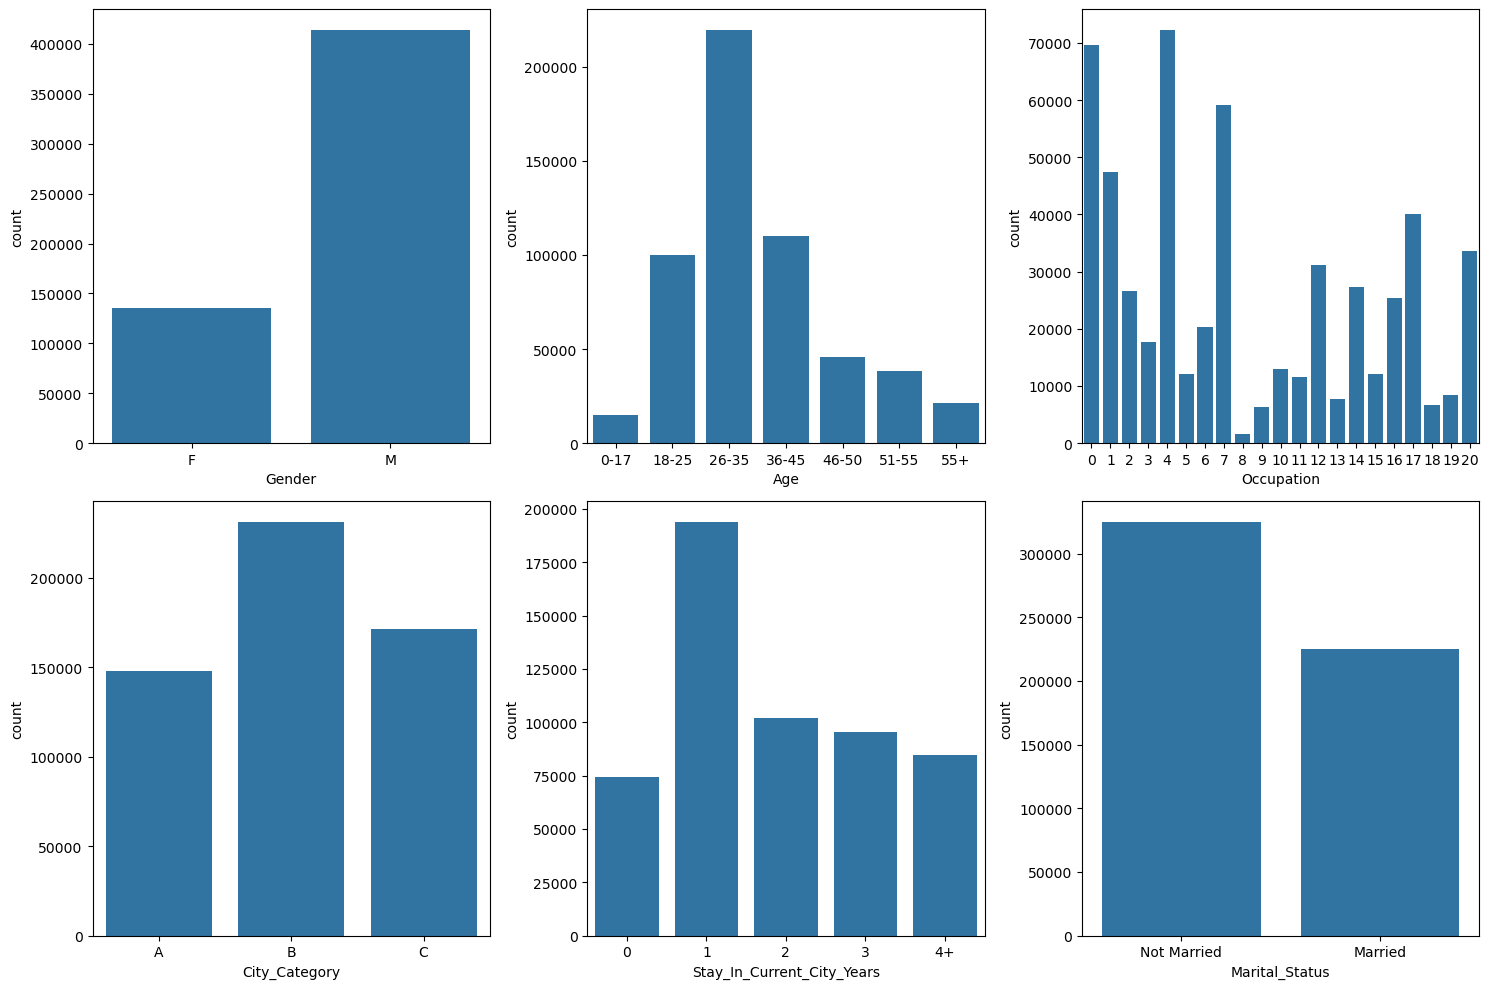

In [13]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1 = sns.countplot(data=df, x=df['Gender'], ax=ax1)
ax2 = sns.countplot(data=df, x=df['Age'], ax=ax2, order = sorted(df['Age'].unique()) )
ax3 = sns.countplot(data=df, x=df['Occupation'], ax=ax3)
ax4 = sns.countplot(data=df, x=df['City_Category'], ax=ax4, order = sorted(df['City_Category'].unique()))
ax5 = sns.countplot(data=df, x=df['Stay_In_Current_City_Years'], ax=ax5, order = sorted(df['Stay_In_Current_City_Years'].unique()))
ax6 = sns.countplot(data=df, x=df['Marital_Status'], ax=ax6)

ax6.set_xticks([0,1],['Not Married','Married'])

fig.tight_layout()
plt.show()

In [15]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

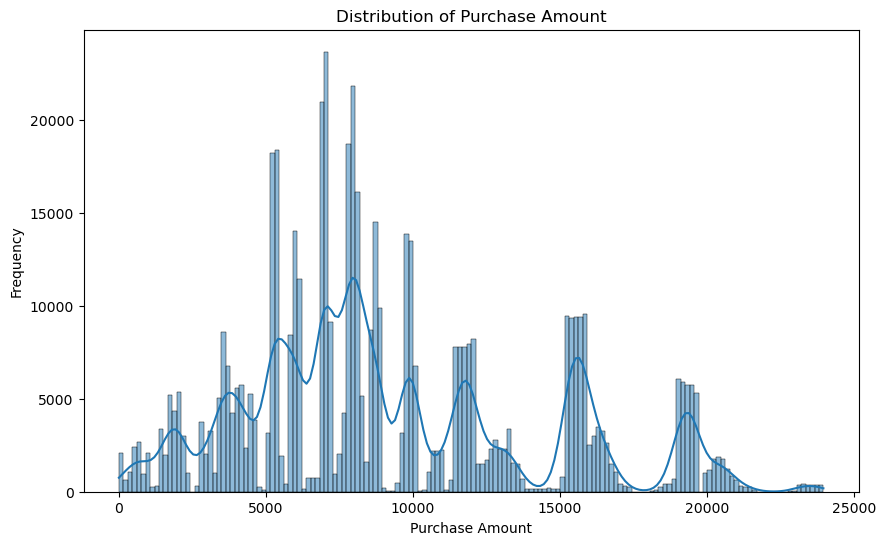

In [142]:
#총 구매 금액 
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Purchase', kde=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')

plt.show()

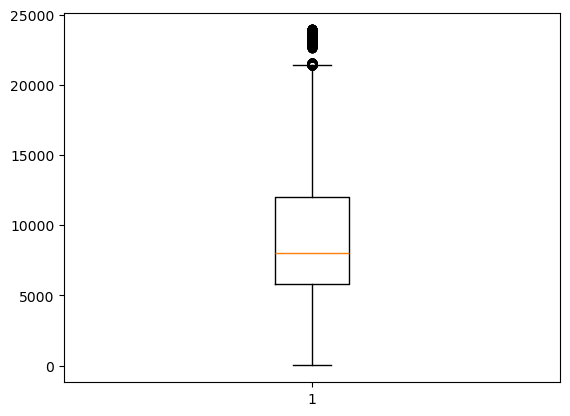

In [143]:
plt.boxplot(data=df, x='Purchase')
plt.show()

### 3-1-1. 구매 금액에 대한 분석

- 구매 금액의 분포가 넓고, 고객들의 소비 패턴이 다양함 (다양한 가격대의 구매가 이루어짐). 
- 일부 고객은 적은 금액을 지출하는 반면, 많은 금액을 지출하는 고객도 있다.
- 중앙값이 평균보다 낮아 데이터가 약간 오른쪽으로 치우쳐저 있음
  -> 많은 고객들이 평균 이하의 금액을 지출, 소수의 고객이 매우 큰 금액을 지출하여 평균을 높이고 있는 상황(VIP 고객 가능성) <br>
=> 고객 행동 이해와 마케팅 효과 측정하기 위한 정확한 분석을 위해 평균 구매 금액과 비교하여 분석


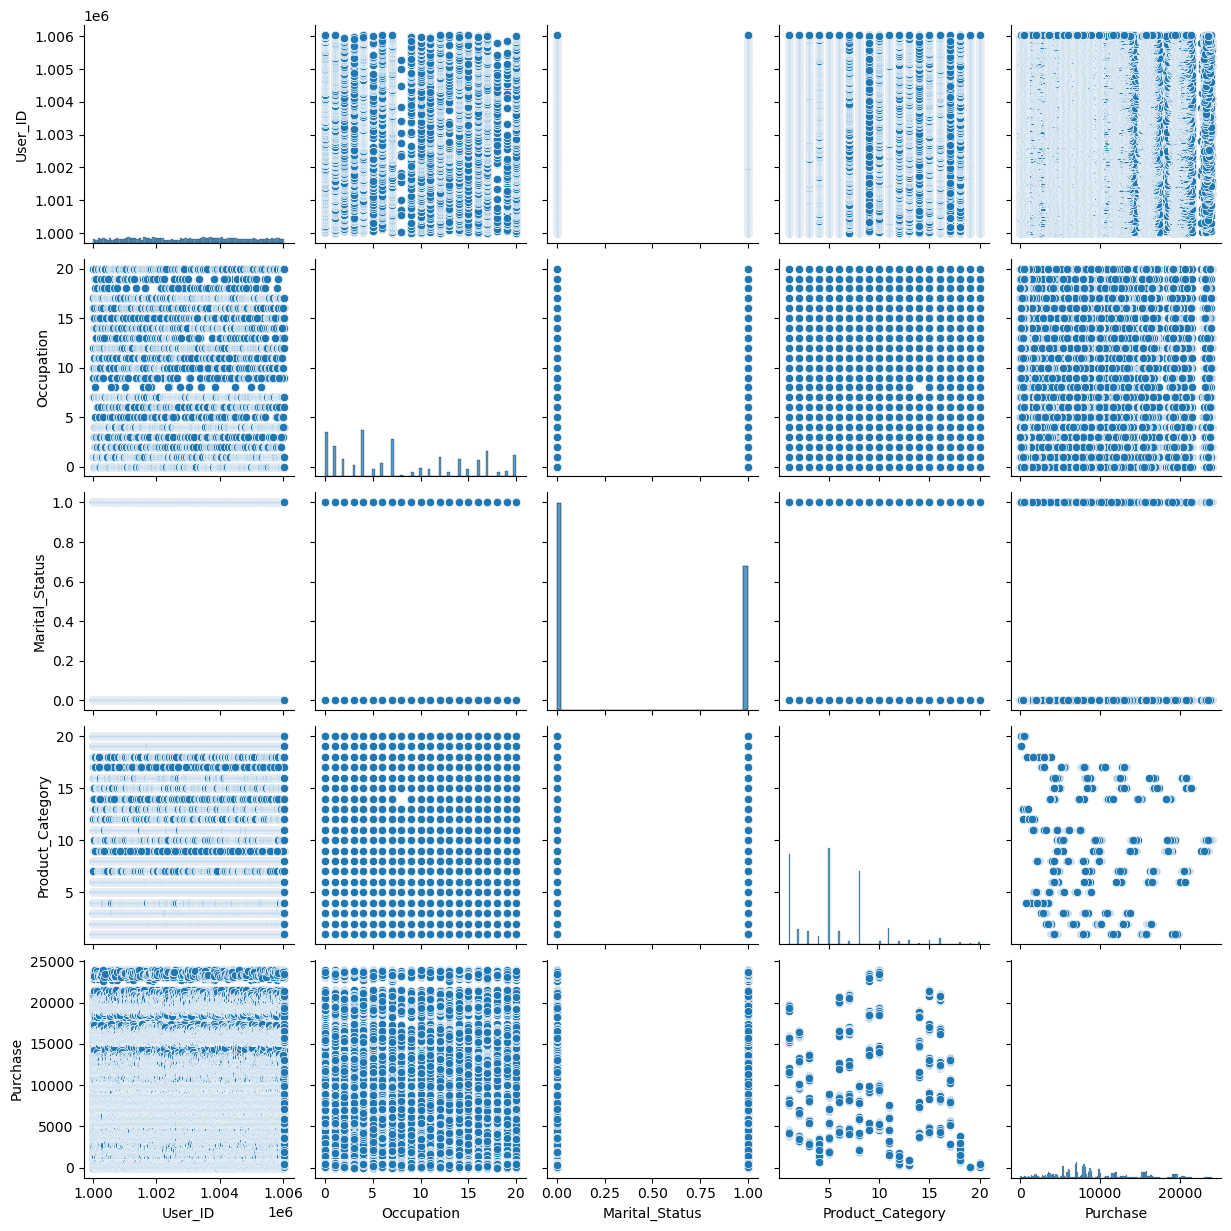

In [157]:
sns.pairplot(df)
plt.show()

In [154]:
df_corr = df.corr(numeric_only=True)
df_corr

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<Axes: >

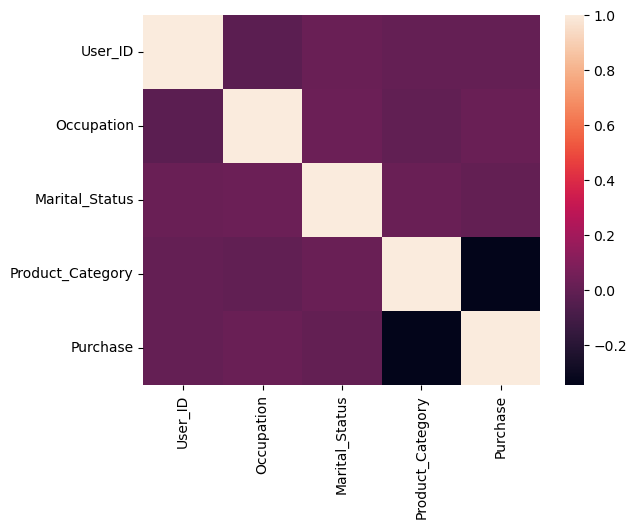

In [155]:
sns.heatmap(df_corr)

## 3-2. 전체적인 데이터 분석

1. Gender: 여성 고객보다 남성 고객이 대체적으로 반 이상 더 많다.
2. Age: 6개의 나이 그룹 중, 26-35 나이의 그룹이 가장 많고, 그 이후 36-45 와 18-25 가 뒤따른다.
3. Occupation: 직업 그룹 분포 중 0, 4 그룹이 가장 많고, 8 그룹이 가장 적다
4. City_Category: 시티 카테고리 중 B 지역이 가장 구매가 많았고, 50000 이상으로 A가 가장 적었다.
5. Stay_In_Current_City_Year 중 1년간 살고 있는 고객들이 가장 많았고 나머지는 다 비슷했다
6. Marital_Status: 결혼하지 않은 고객들이 더 많았다.
7. Product Category 와 구매금액과 음의 상관관계를 보이는 면이 있다는 것을 제외하고는 전체적으로 변수끼리의 상관성은 관련이 많이 없어 보인다.

## 3-2. VIP 고객 도출 

In [21]:
# 기존 고객의 VIP 가능성 평가 
df['User_ID'].value_counts() 
#여러 번 중복 된다는 것을 보여줌. 고객들이 여러 번 구매 했음을 나타냄 
#-> 고객별로 하나의 레코드가 아닌 구매 내역별로 나뉘어 있다는 뜻
#-> 고객의 전체 구매 행동을 분석 -> 각 고객의 구매 내역을 집계 

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: count, Length: 5891, dtype: int64

In [51]:
# 고객별 (User_ID) 총 구매 금액 계산
customer_summary = df.groupby('User_ID')['Purchase'].sum().reset_index()

# VIP 여부 결정
vip_threshold = 100000 #구매금액이 100000 이상시 VIP
customer_summary['VIP'] = customer_summary['Purchase'] >= vip_threshold

# VIP 및 Non-VIP 고객의 평균 구매 금액 계산
vip_counts = customer_summary.groupby('VIP')['Purchase'].mean().reset_index()

# VIP 및 Non-VIP 고객 구분
vip_counts['Customer_Type'] = vip_counts['VIP'].replace({True: 'VIP', False: 'Non-VIP'})
vip_counts = vip_counts[['Customer_Type', 'Purchase']]
vip_counts

,Customer_Type,Purchase
0,Non-VIP,82632.957576
1,VIP,887561.701711


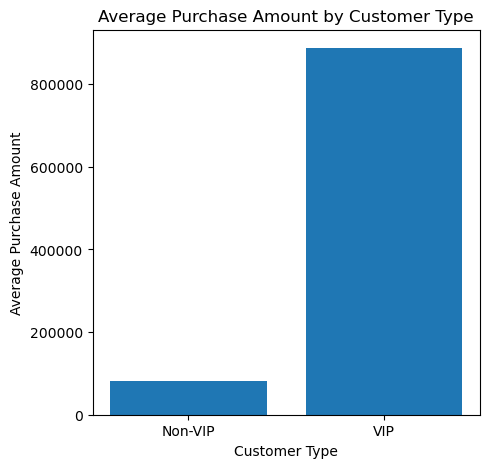

In [58]:
# 그래프 그리기
plt.figure(figsize=(5, 5))
plt.bar(vip_counts['Customer_Type'], vip_counts['Purchase'])
plt.title('Average Purchase Amount by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Average Purchase Amount')
plt.show()

### VIP 분석 결과:
- 각 고객 (User_ID)의 총 구매 금액 (Purchase)을 계산하여 구매 금액이 100000을 초과하는 고객을 VIP로 설정하고 VIP와 Non-VIP를 계산하여 그래프를 그렸음
- 소비 차이는 VIP 고객은 Non-VIP 보다 약 10배 정도 차이나는 더 많은 금액을 지출
- 이미 기존 VIP 고객이 많아 VIP 고객 유지를 시키는 것이 중요
- VIP 고객에게 맞춤형 혜택을 제공, 로얄티를 높임 eg) VIP 고객 전용 할인 혜택, VIP의 생일 및 기념일에 맞춘 특별 이벤트 등..
- Non-VIP 를 VIP 로 전환하기 위한 마케팅 전략도 필요 eg) 더 높은 소비를 위한 보상 제공 등..

- 고객 세분화 (인구통계, 구매 빈도, 구매한 제품의 유형, 시간에 따른 구매 행동의 변화 등 각 그룹의 소비 형태 등) 추가 조사 필요

## 3-3. 지역별 구매 특성

### 3-3-1. 도시 그룹별 평균 구매 금액

In [53]:

city_purchase = df.groupby('City_Category')['Purchase'].mean().reset_index()
city_purchase

,City_Category,Purchase
0,A,8911.939216
1,B,9151.300563
2,C,9719.920993


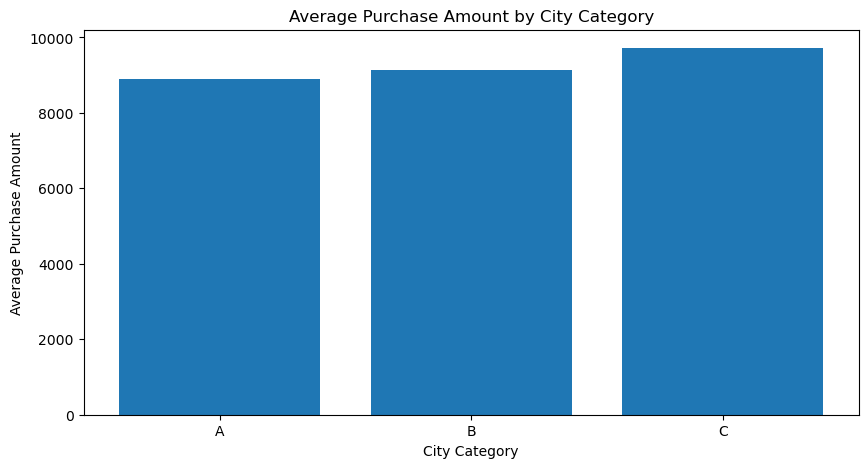

In [68]:
plt.figure(figsize=(10,5))
plt.bar(city_purchase['City_Category'],city_purchase['Purchase'])
plt.title('Average Purchase Amount by City Category')
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.show()

### 3-3-2. 거주 연수별 평균 구매 금액

In [60]:
stay_purchase = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().reset_index()
stay_purchase

,Stay_In_Current_City_Years,Purchase
0,0,9180.075123
1,1,9250.145923
2,2,9320.429810
3,3,9286.904119
4,4+,9275.598872


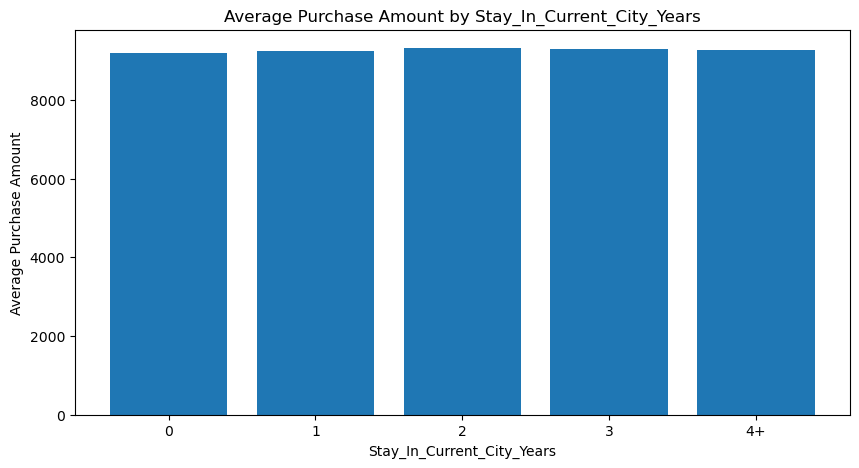

In [67]:
plt.figure(figsize=(10, 5))
plt.bar(stay_purchase['Stay_In_Current_City_Years'], stay_purchase['Purchase'])
plt.title('Average Purchase Amount by Stay_In_Current_City_Years')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Average Purchase Amount')
plt.show()

### 3-3-3. 제품 카테고리별 도시 카테고리에서의 선호도 분석

In [114]:
city_product_category = df.groupby(['City_Category', 'Product_Category'])['Purchase'].mean().unstack()
city_product_category

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
City_Category,,,,,,,,,,,,,,,,,,,,
A,13047.176933,10903.554796,10032.381145,2269.740000,6117.839355,15519.767750,16239.243883,7328.067156,14821.145455,19530.493623,4577.935919,1334.723424,703.957249,12616.948025,14655.071054,14261.713834,9747.702479,2939.503320,36.934066,374.333333
B,13435.925703,11133.902528,9998.072552,2300.053578,6168.591974,15751.003049,16355.068793,7454.787942,15690.545977,19612.452739,4612.275536,1329.501493,713.833554,12992.729430,14584.587187,14584.411590,10191.273408,2959.166307,38.021645,380.378486
C,14233.967350,11715.205111,10271.016609,2426.718723,6458.683833,16227.248407,16557.659598,7721.211798,15951.134921,19862.731637,4889.939036,1394.638544,751.981971,13986.680488,15158.730749,15503.533990,10411.352632,3017.775178,36.554147,363.516930


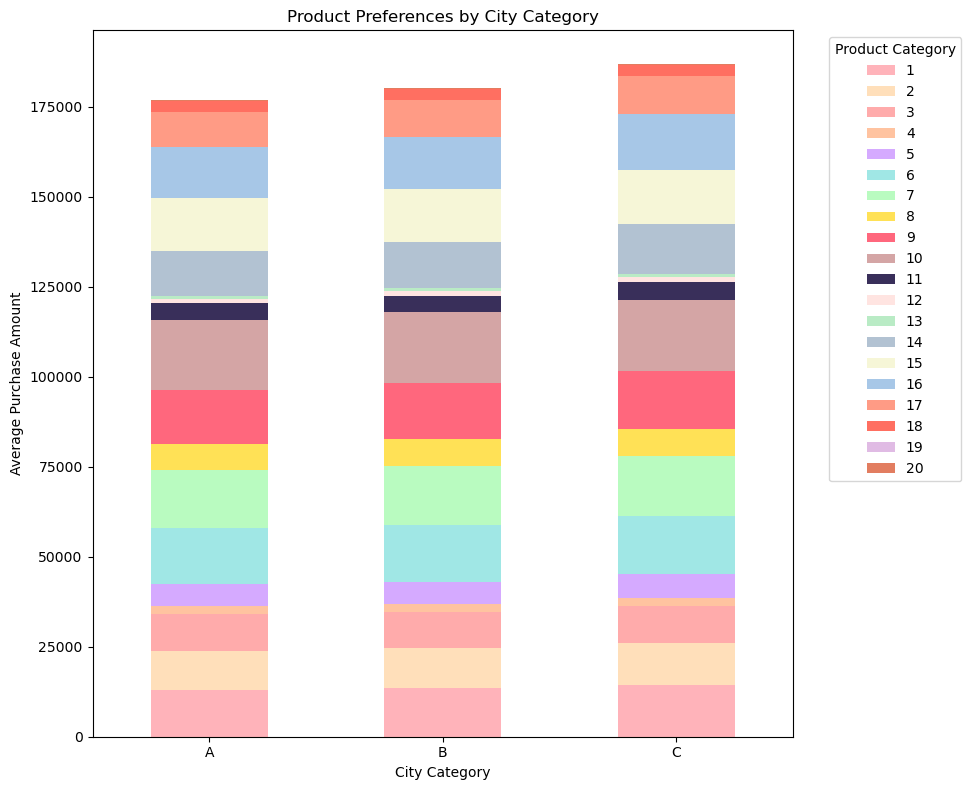

In [116]:
# 제품 카테고리별 도시 카테고리에서의 선호도 그래프
city_product_category.plot(kind='bar', stacked=True, figsize=(10, 8), color = colors)
plt.title('Product Preferences by City Category')
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Product Category', loc='upper right', bbox_to_anchor=(1.25,1))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 지역별 구매 특성 분석 결과:

- 각 도시 그룹과 거주 연수별 평균 금액은 비슷해 보임
- C 도시 그룹이 가장 높은 금액 구매 했고, A 도시 그룹이 가장 낮은 금액을 보인다.
- 거주 기간은 늘어날수록 평균 구매 금액이 아주 약간씩 증가하는 경향
- A 도시 특성에 맞는 광고나 마케팅 전략이나 제품 제공 방식에 대한 검토 필요. 이 지역의 고객의 필요와 선호도를 조사
- 제품 선호도를 봤을때, 세 도시 모두 제품 6,7,10 이 가장 인기가 있음. 이 제품들의 라인업을 확대하고 관련 마케팅을 강화. 세 도시 모두 가장 인기가 없는 4,12,13,17번 제품들은 재검토 필요


## 3-4. 인구 통계에 따른 구매 패턴

### 3-4-1. 연령대별 평균 구매 금액

In [63]:
age_purchase = df.groupby('Age')['Purchase'].mean().reset_index()
age_purchase

,Age,Purchase
0,0-17,8933.464640
1,18-25,9169.663606
2,26-35,9252.690633
3,36-45,9331.350695
4,46-50,9208.625697
5,51-55,9534.808031
6,55+,9336.280459


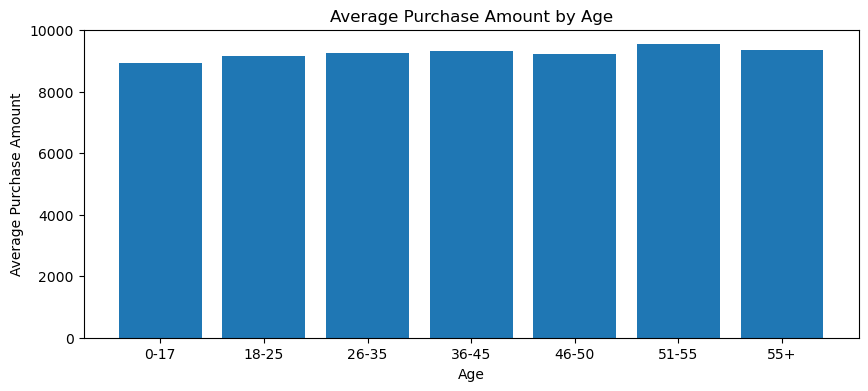

In [138]:
fig = plt.figure(figsize = (10,4))
plt.bar(age_purchase['Age'], age_purchase['Purchase'])
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.show()

### 3-4-2. 성별에 따른 평균 구매 금액

In [117]:
gender_purchase = df.groupby('Gender')['Purchase'].mean().reset_index()
gender_purchase

,Gender,Purchase
0,F,8734.565765
1,M,9437.526040


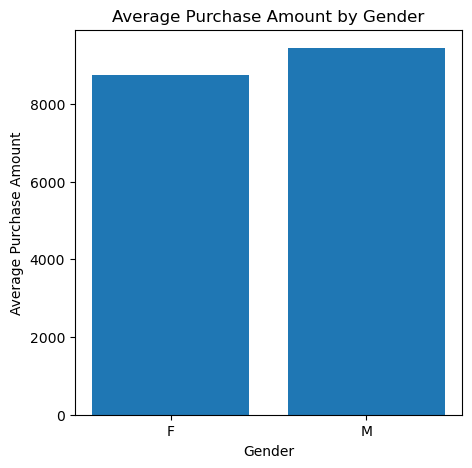

In [139]:
plt.figure(figsize=(5,5))
plt.bar(gender_purchase['Gender'], gender_purchase['Purchase'])
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()

### 3-4-3. 직업군별 평균 구매 금액

In [21]:
occupation_purchase = df.groupby('Occupation')['Purchase'].mean().reset_index()
occupation_purchase

,Occupation,Purchase
0,0,9124.428588
1,1,8953.193270
2,2,8952.481683
3,3,9178.593088
4,4,9213.980251
5,5,9333.149298
6,6,9256.535691
7,7,9425.728223
8,8,9532.592497
9,9,8637.743761


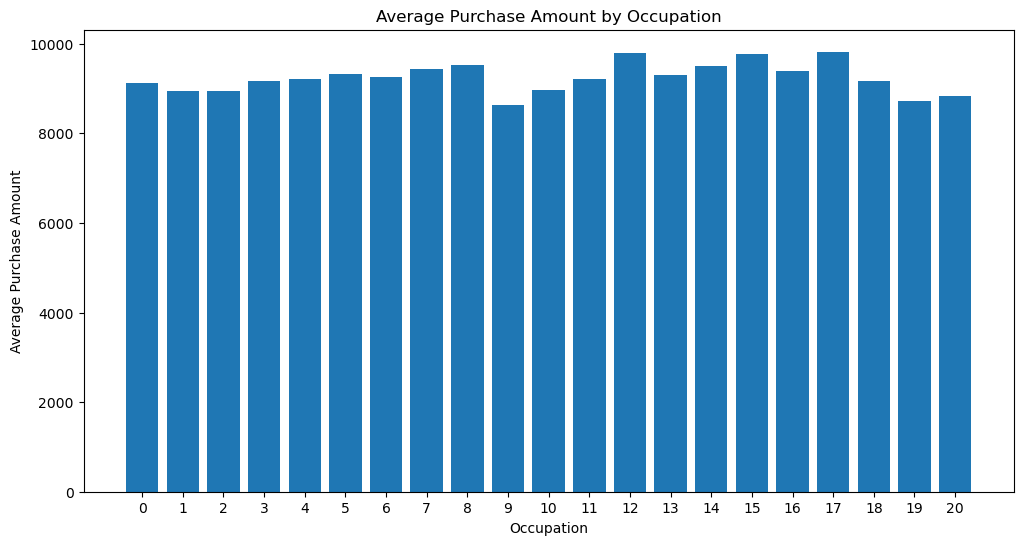

In [22]:
# 직업군별 평균 구매 금액 막대 차트
plt.figure(figsize=(12, 6))
plt.bar(occupation_purchase['Occupation'], occupation_purchase['Purchase'])
plt.title('Average Purchase Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Purchase Amount')
plt.xticks(occupation_purchase['Occupation'])
plt.show()

### 3-4-4. 혼인 여부별 평균 구매 금액

In [135]:
marital_status_purchase = df.groupby('Marital_Status')['Purchase'].mean().reset_index()
marital_status_purchase

,Marital_Status,Purchase
0,0,9265.907619
1,1,9261.174574


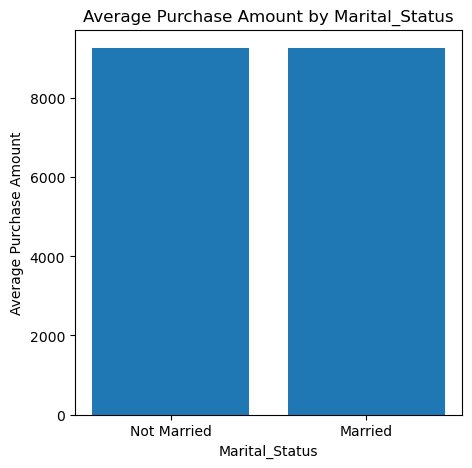

In [141]:
plt.figure(figsize=(5,5))
plt.bar(marital_status_purchase['Marital_Status'],marital_status_purchase['Purchase'])
plt.title('Average Purchase Amount by Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Average Purchase Amount')
plt.xticks([0,1],['Not Married','Married'])
plt.show()

### 인구 통계별 구매 특성 분석 결과:

- 연령, 성별, 직업군, 혼인 여부에 대한 평균 구매 금액은 전체적으로 다 비슷한 그래프 수치를 그리고 있다.
- 연령별 타켓은 51-55세 그룹이 가장 높고 0-25 층이 가장 낮다. 젋은 층 유치를 위한 트렌디한 제품 및 디지털 마케팅 강화 필요
- 남성 고객이 평균 구매 금액이 조금 더 높은 구매 층이다. 
- 상위 구매 직업군은 (12,15,17번)을 위한 직업적 제품 라인업 확대하고 하위 구매 직업군을 위해 경쟁력 있는 제품 개발
- 기혼 여부의 차이는 아주 미미하지만 미혼 고객의 평균 구매 금액이 약간 더 높다. 미혼 고객에게 인기 있는 상품을 조사하고 마케팅을 강화한다. 결혼을 앞둔 고객 타켓팅도 생각해 볼 수 있다. 

## 3-5. 요약 